Predecir niveles de ruido cerca de aeropuerto.
Evaluar impacto acústico en zonas cercanas.
Datos de Dirección General de Aeronáutica Civil (DGAC)

Preguntas clave:
- ¿Qué factores influyen más en el ruido?
- ¿Hay diferencias según la aerolínea, hora o tipo de avión?
- ¿Por qué los sensores registran más ruido en las noches?


Diccionario de Variables
- NMT : Noise Monitoring Terminal: código del punto o estación de monitoreo de ruido.
- TLASmax : Timestamp de LASmax: fecha y hora de medición del nivel máximo de ruido.
- LASmax : Nivel máximo instantáneo de presión sonora ponderado A (dBA). Representa el mayor pico de ruido registrado durante el paso de una aeronave.
- SEL : Sound Exposure Level (dBA): Nivel de exposición sonora total de un evento de ruido, considerando duración y energía.
- Leq : Nivel equivalente (dBA): nivel continuo de presión sonora con la misma energía que el ruido fluctuante durante un período.
- LAZ : Nivel de ruido ponderado A con corrección de altitud o distancia (dBA). Es menos común, pero puede ser una medida ajustada.
- EPNL : Effective Perceived Noise Level (dB EPNL): Nivel de ruido percibido ajustado por la duración y características de la aeronave, usado en certificación aeronáutica.
- Temperature [°C] : Temperatura ambiental en grados Celsius. Puede influir en la propagación del sonido.
- A/D : Arrival / Departure: indica si el vuelo está aterrizando o despegando.
- Runway : Pista utilizada por la aeronave.
- Flight : Número de vuelo de la aeronave.
- Airline : Código IATA o ICAO de la aerolínea (ej: LAN, SKY).
- Airline (Name) : Nombre completo de la aerolínea.
- From/To : Ciudad o aeropuerto de origen o destino. Depende si es llegada o salida.
- Callsign : Identificador de radio usado por la aeronave.
- Aircraft Type : Tipo de aeronave.



EDA

Los sensores a demás de captar los eventos de ruido de los aviones, tambien capta ruido generado por otros agentes.
Es decir, los nulos no representan ningun evento otorgado por una aeronave.

In [ ]:
#descargar datos de los sensores
import pandas as pd

df1 = pd.read_excel('/content/NOISE TMR1.xlsx', skiprows=3)
df2 = pd.read_excel('/content/NOISE TMR2.xlsx', skiprows=3)
df3 = pd.read_excel('/content/NOISE TMR3.xlsx', skiprows=3)

In [ ]:
#borrar primera fila vacia
df1 = df1.drop(index=0)
df2 = df2.drop(index=0)
df3 = df3.drop(index=0)

In [ ]:
#Cuantos nulos hay en cada df
nulos1 = df1.isnull().sum().sum()
nulos2 = df2.isnull().sum().sum()
nulos3 = df3.isnull().sum().sum()
print(f'Hay {nulos1} nulos en el df1')
print(f'Hay {nulos2} nulos en el df2')
print(f'Hay {nulos3} nulos en el df3')

Hay 295228 nulos en el df1
Hay 200272 nulos en el df2
Hay 569901 nulos en el df3


In [ ]:
#borrar nulos
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [ ]:
#Eliminar columnas innecesarias
df1 = df1.drop(columns=['Flight', 'Callsign'])
df2 = df2.drop(columns=['Flight', 'Callsign'])
df3 = df3.drop(columns=['Flight', 'Callsign'])

In [ ]:
#Transformar TLASmax en datetime
df1['TLASmax'] = pd.to_datetime(df1['TLASmax'], format='%d/%m/%Y %H:%M:%S')
df2['TLASmax'] = pd.to_datetime(df2['TLASmax'], format='%d/%m/%Y %H:%M:%S')
df3['TLASmax'] = pd.to_datetime(df3['TLASmax'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
#Agregar columna Hour y DayOfWeek y Date
df1['Hour'] = df1['TLASmax'].dt.hour
df1['DayOfWeek'] = df1['TLASmax'].dt.dayofweek
df1['Date'] = df1['TLASmax'].dt.date
df2['Hour'] = df2['TLASmax'].dt.hour
df2['DayOfWeek'] = df2['TLASmax'].dt.dayofweek
df2['Date'] = df2['TLASmax'].dt.date
df3['Hour'] = df3['TLASmax'].dt.hour
df3['DayOfWeek'] = df3['TLASmax'].dt.dayofweek
df3['Date'] = df3['TLASmax'].dt.date

In [ ]:
#Eliminar TLASmax
df1 = df1.drop(columns=['TLASmax'])
df2 = df2.drop(columns=['TLASmax'])
df3 = df3.drop(columns=['TLASmax'])

In [ ]:
#Eliminar las otras columnas de ruido
df1 = df1.drop(columns=['SEL', 'Leq', 'LAZ','EPNL'])
df2 = df2.drop(columns=['SEL', 'Leq', 'LAZ','EPNL'])
df3 = df3.drop(columns=['SEL', 'Leq', 'LAZ','EPNL'])

In [ ]:
#Cambiar nombre de la columna Temperature [°C] a Temp
df1 = df1.rename(columns={'Temperature [°C]': 'Temp'})
df2 = df2.rename(columns={'Temperature [°C]': 'Temp'})
df3 = df3.rename(columns={'Temperature [°C]': 'Temp'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30894 entries, 1 to 75512
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NMT             30894 non-null  object 
 1   LASmax          30894 non-null  float64
 2   Temp            30894 non-null  float64
 3   A/D             30894 non-null  object 
 4   Runway          30894 non-null  object 
 5   Airline         30894 non-null  object 
 6   Airline (Name)  30894 non-null  object 
 7   From/To         30894 non-null  object 
 8   Aircraft Type   30894 non-null  object 
 9   Hour            30894 non-null  int32  
 10  DayOfWeek       30894 non-null  int32  
 11  Date            30894 non-null  object 
dtypes: float64(2), int32(2), object(8)
memory usage: 2.8+ MB


In [ ]:
#definir target y features
target = 'LASmax'
features = ['Hour', 'DayOfWeek','Temp','A/D','Runway','Airline','From/To','Aircraft Type']

In [ ]:
from sklearn.model_selection import train_test_split
#Dividir en train y test
X1 = df1[features]
y1 = df1[target]
X2 = df2[features]
y2 = df2[target]
X3 = df3[features]
y3 = df3[target]
for col in ['A/D', 'Runway', 'Airline', 'From/To', 'Aircraft Type']:
    X1[col], _ = pd.factorize(X1[col])
    X2[col], _ = pd.factorize(X2[col])
    X3[col], _ = pd.factorize(X3[col])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
#Guardar en csv
X_train1.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_train1.csv', index=False)
X_test1.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_test1.csv', index=False)
y_train1.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_train1.csv', index=False)
y_test1.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_test1.csv', index=False)
X_train2.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_train2.csv', index=False)
X_test2.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_test2.csv', index=False)
y_train2.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_train2.csv', index=False)
y_test2.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_test2.csv', index=False)
X_train3.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_train3.csv', index=False)
X_test3.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/X_test3.csv', index=False)
y_train3.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_train3.csv', index=False)
y_test3.to_csv('https://raw.githubusercontent.com/aalvarezq/proyecto/refs/heads/main/data/processed/y_test3.csv', index=False)

<ipython-input-21-f4017e7f157b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[col], _ = pd.factorize(X1[col])
<ipython-input-21-f4017e7f157b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2[col], _ = pd.factorize(X2[col])
<ipython-input-21-f4017e7f157b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
#probar modelo random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#Entrenar modelo
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
rf3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf3.fit(X_train3, y_train3)

RandomForestRegressor(random_state=42)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51556 entries, 4 to 85468
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NMT             51556 non-null  object 
 1   LASmax          51556 non-null  float64
 2   Temp            51556 non-null  float64
 3   A/D             51556 non-null  object 
 4   Runway          51556 non-null  object 
 5   Airline         51556 non-null  object 
 6   Airline (Name)  51556 non-null  object 
 7   From/To         51556 non-null  object 
 8   Aircraft Type   51556 non-null  object 
 9   Hour            51556 non-null  int32  
 10  DayOfWeek       51556 non-null  int32  
 11  Date            51556 non-null  object 
dtypes: float64(2), int32(2), object(8)
memory usage: 4.7+ MB


In [ ]:
#predecir
y_pred1 = rf1.predict(X_test1)
y_pred2 = rf2.predict(X_test2)
y_pred3 = rf3.predict(X_test3)
#calcular error
mse1 = mean_squared_error(y_test1, y_pred1)
mse2 = mean_squared_error(y_test2, y_pred2)
mse3 = mean_squared_error(y_test3, y_pred3)
r2_1 = r2_score(y_test1, y_pred1)
r2_2 = r2_score(y_test2, y_pred2)
r2_3 = r2_score(y_test3, y_pred3)
print('MSE1:', mse1)
print('MSE2:', mse2)
print('MSE3:', mse3)
print('R2_1:', r2_1)
print('R2_2:', r2_2)
print('R2_3:', r2_3)

MSE1: 23.074143348909693
MSE2: 3.0173036368386907
MSE3: 7.308484377077809
R2_1: 0.1440274558691934
R2_2: 0.8233999450960562
R2_3: 0.6063531351587309


In [ ]:
from sklearn.model_selection import GridSearchCV
#Definir el modelo
rf2 = RandomForestRegressor(random_state=42)
#Definir los parametros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
#Definir el grid search
grid_search2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#Entrenar el grid search
grid_search2.fit(X_train2, y_train2)
#Imprimir los mejores parametros
print('Mejores parametros 2:', grid_search2.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parametros 2: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#Entrenar modelo
rf2 = RandomForestRegressor(n_estimators=200,max_depth= 20, min_samples_leaf= 2, min_samples_split= 5 ,random_state=42)
rf2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
#predecir
y_pred2 = rf2.predict(X_test2)
#calcular error
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
print('con los mejores hiperparametros para sensor 2. MSE:', mse2)
print('con los mejores hiperparametros para sensor 2. R2:', r2_2)


con los mejores hiperparametros para sensor 2. MSE: 2.8425596181506725
con los mejores hiperparametros para sensor 2. R2: 0.8336275545807855


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Función para evaluar modelos y calcular R²
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()

    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predecir
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    end_time = time.time()
    training_time = end_time - start_time

    print(f"\n{'='*50}")
    print(f"Evaluación de {model_name}:")
    print(f"- MSE: {mse:.4f}")
    print(f"- R²: {r2:.4f}")
    print(f"- Tiempo de entrenamiento: {training_time:.2f} segundos")

    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        pd.Series(model.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh')
        plt.title(f"Importancia de características - {model_name}")
        plt.show()

    return model, mse, r2


Entrenando modelo XGBoost...

Evaluación de XGBoost:
- MSE: 2.7679
- R²: 0.8380
- Tiempo de entrenamiento: 0.73 segundos


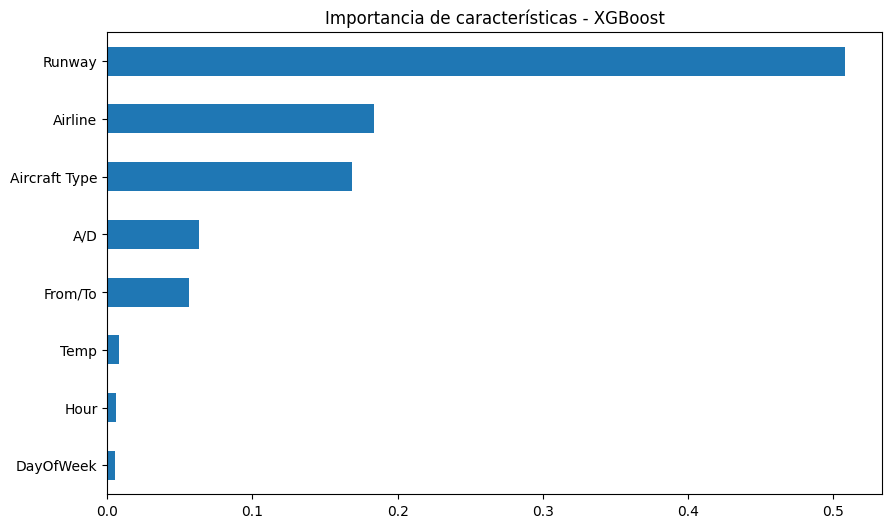

In [ ]:
print("\nEntrenando modelo XGBoost...")
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    eval_metric='rmse'
)

xgb_model, xgb_mse, xgb_r2 = evaluate_model(
    xgb_model,
    X_train2, y_train2, X_test2, y_test2,
    "XGBoost"
)


Entrenando modelo CatBoost...

Evaluación de CatBoost:
- MSE: 2.9314
- R²: 0.8284
- Tiempo de entrenamiento: 4.70 segundos


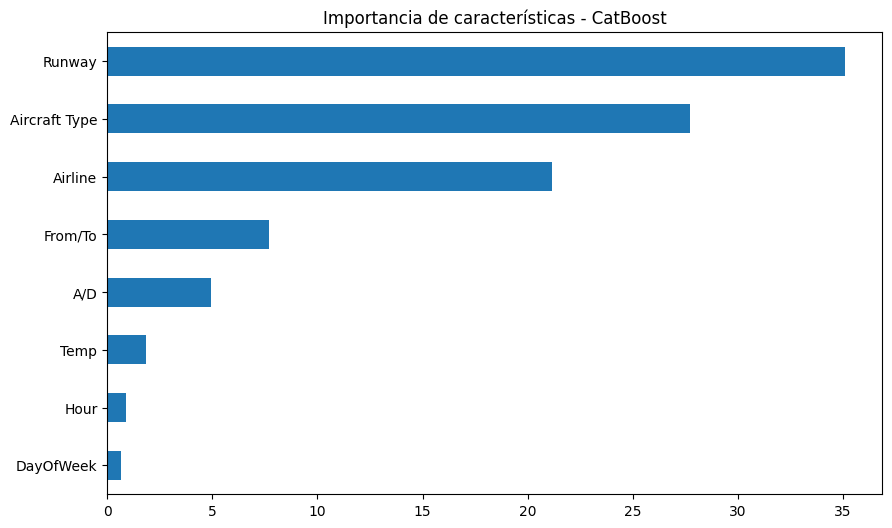

In [ ]:
print("\nEntrenando modelo CatBoost...")
cat_features_indices = [i for i, col in enumerate(X_train2.columns) if col in ['A/D', 'Runway', 'Airline', 'From/To', 'Aircraft Type']]

catboost_model = CatBoostRegressor(
    iterations=200,
    depth=6,
    learning_rate=0.05,
    random_state=42,
    cat_features=cat_features_indices,
    silent=True  # Para no mostrar output durante entrenamiento
)

catboost_model, cat_mse, cat_r2 = evaluate_model(
    catboost_model,
    X_train2, y_train2, X_test2, y_test2,
    "CatBoost"
)


Entrenando modelo Gradient Boosting...

Evaluación de Gradient Boosting:
- MSE: 2.7648
- R²: 0.8382
- Tiempo de entrenamiento: 22.34 segundos


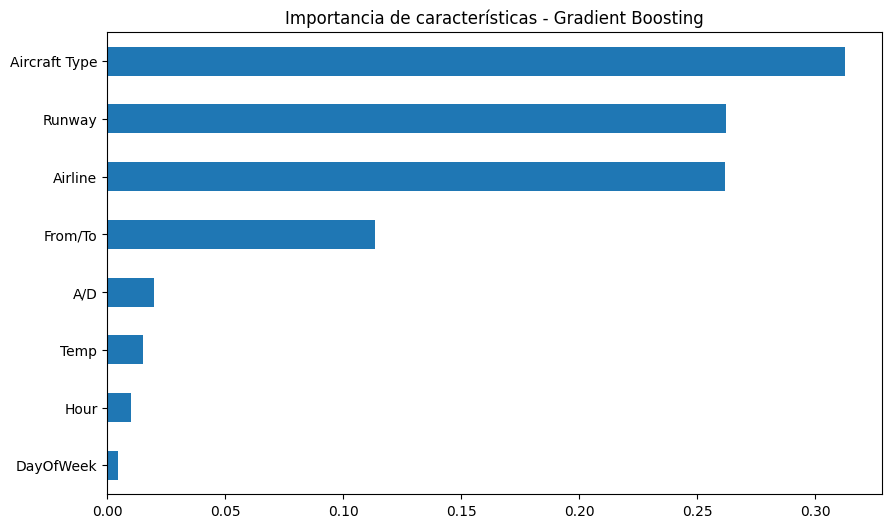

In [ ]:
# 3. Gradient Boosting (Scikit-learn)
print("\nEntrenando modelo Gradient Boosting...")
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

gb_model, gb_mse, gb_r2 = evaluate_model(
    gb_model,
    X_train2, y_train2, X_test2, y_test2,
    "Gradient Boosting"
)


In [ ]:
results = pd.DataFrame({
    'Modelo': ['XGBoost', 'CatBoost', 'Gradient Boosting'],
    'MSE': [xgb_mse, cat_mse, gb_mse],
    'R²': [xgb_r2, cat_r2, gb_r2]
}).sort_values('R²', ascending=False)

# Comparación detallada de resultados
print("\n" + "="*50)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*50)
print(results.to_string(index=False))



COMPARACIÓN FINAL DE MODELOS
           Modelo      MSE       R²
Gradient Boosting 2.764817 0.838178
          XGBoost 2.767918 0.837996
         CatBoost 2.931383 0.828429


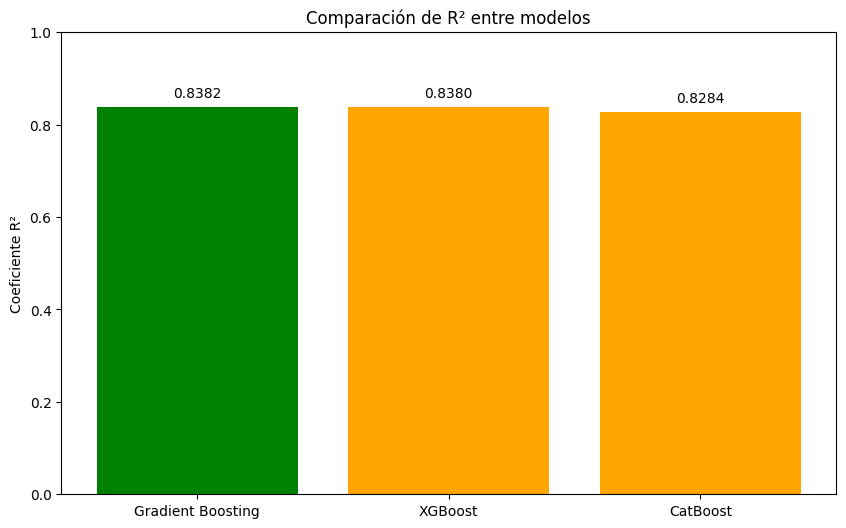

In [ ]:
# Gráfico comparativo de R²
plt.figure(figsize=(10, 6))
plt.bar(results['Modelo'], results['R²'], color=['green', 'orange', 'orange'])
plt.title('Comparación de R² entre modelos')
plt.ylabel('Coeficiente R²')
plt.ylim(0, 1)
for i, v in enumerate(results['R²']):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
gb_model = GradientBoostingRegressor(random_state=42)

# Parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en hojas
    'subsample': [0.8, 0.9, 1.0],  # Submuestreo de instancias
    'max_features': ['auto', 'sqrt', 'log2']  # Debí haber sacado auto, porque no corresponde a gradientboost

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 folds
    scoring='neg_mean_squared_error',  # Métrica a optimizar (también puedes usar 'r2')
    n_jobs=-1,  # Usar todos los núcleos del CPU
    verbose=2  # Mostrar progreso
)

# Ejecutar la búsqueda
grid_search.fit(X_train2, y_train2)

# Mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo
best_gb = grid_search.best_estimator_

# Evaluar el modelo optimizado
y_pred = best_gb.predict(X_test2)
print(f"\nR² optimizado: {r2_score(y_test2, y_pred):.4f}")
print(f"MSE optimizado: {mean_squared_error(y_test2, y_pred):.4f}")


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
4860 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2673 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/


Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}

R² optimizado: 0.8453
MSE optimizado: 2.6439


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

xgb = XGBRegressor(random_state=42, verbosity=0)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0],  # Equivale a max_features
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train2, y_train2)

best_xgb = random_search.best_estimator_

# Evaluar
y_pred = best_xgb.predict(X_test2)
print("\nMejores parámetros:", random_search.best_params_)
print(f"R²: {r2_score(y_test2, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test2, y_pred):.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores parámetros: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
R²: 0.8432
MSE: 2.6787


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

cat = CatBoostRegressor(verbose=0, random_state=42)

param_dist = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5, 7],
    'subsample': [0.8, 1.0]
}

random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_cat.fit(X_train2, y_train2)

best_cat = random_search_cat.best_estimator_

# Evaluar
y_pred_cat = best_cat.predict(X_test2)
print("\nMejores parámetros:", random_search_cat.best_params_)
print(f"R²: {r2_score(y_test2, y_pred_cat):.4f}")
print(f"MSE: {mean_squared_error(y_test2, y_pred_cat):.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores parámetros: {'subsample': 0.8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 8}
R²: 0.8418
MSE: 2.7023


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]  # 'auto' no se acepta en GradientBoostingRegressor
}

random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_gbr.fit(X_train2, y_train2)

best_gbr = random_search_gbr.best_estimator_

# Evaluación
y_pred_gbr = best_gbr.predict(X_test2)
print("\nMejores parámetros:", random_search_gbr.best_params_)
print(f"R²: {r2_score(y_test2, y_pred_gbr):.4f}")
print(f"MSE: {mean_squared_error(y_test2, y_pred_gbr):.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Mejores parámetros: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.1}
R²: 0.8371
MSE: 2.7829


In [ ]:
#guardar modelo
import pickle
with open('best_xgb_843_47.pkl', 'wb') as file:
  pickle.dump(best_xgb, file)

In [ ]:
import json
X2_processed = X2.copy()
for col in ['A/D', 'Runway', 'Airline', 'From/To', 'Aircraft Type']:
    X2_processed[col], _ = pd.factorize(X2_processed[col])

with open("feature_order.json", "w") as f:
    json.dump(list(X2_processed.columns), f, ensure_ascii=False)

In [ ]:
# Guarda los valores únicos ORIGINALES
categories = {
    "A/D": {v: k for k, v in dict(enumerate(df2["A/D"].astype(str).unique())).items()},
    "Runway": {v: k for k, v in dict(enumerate(df2["Runway"].astype(str).unique())).items()},
    "Airline": {v: k for k, v in dict(enumerate(df2["Airline"].astype(str).unique())).items()},
    "From/To": {v: k for k, v in dict(enumerate(df2["From/To"].astype(str).unique())).items()},
    "Aircraft Type": {v: k for k, v in dict(enumerate(df2["Aircraft Type"].astype(str).unique())).items()}
}

with open("categorical_mappings.json", "w") as f:
    json.dump(categories, f)